In [1]:
import os
from pathlib import Path

NOTEBOOK_PATH: Path = Path(os.path.abspath(''))

DATA_PATH: Path = NOTEBOOK_PATH.parent.joinpath('data')

PATH_FOR_RESULT: Path = NOTEBOOK_PATH.joinpath('RESULT')

if not PATH_FOR_RESULT.exists():
    PATH_FOR_RESULT.mkdir()

print(f'当前运行目录：{NOTEBOOK_PATH}')
print(f'当前数据目录：{DATA_PATH}')

当前运行目录：D:\Development\Python\InvestmentWorkshop\notebook
当前数据目录：D:\Development\Python\InvestmentWorkshop\data


# 缠论 A-03

A 系列仅使用 pandas 读取数据，不用于计算。

A-03 使用 object。

## 准备

### 引用模块

In [2]:
from typing import List

import pandas as pd

from utility import (
    get_available_datafile_name,
    load_csv_as_dataframe,
    get_saved_filename,
    save_dataframe_to_csv
)
from InvestmentWorkshop.indicator import (
    pbx,
    ChanTheory
)

Load succeed.


### 设置 pandas

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

### 可用数据

In [4]:
available_datafile = get_available_datafile_name(DATA_PATH, 'Minute')
for symbol, period in available_datafile:
    print(f'symbol: {symbol:>12}, period: {period}')

symbol:    DCE.c2201, period: Minute
symbol:    DCE.i2201, period: Minute
symbol:  SHFE.ag2106, period: Minute
symbol:  SHFE.al2111, period: Minute
symbol:  SHFE.al2112, period: Minute
symbol:  SHFE.hc2110, period: Minute
symbol:  SHFE.hc2201, period: Minute
symbol:  SHFE.hc2202, period: Minute
symbol:  SHFE.rb2201, period: Minute


### 声明数据

使用分钟数据

In [5]:
symbol: str = 'SHFE.al2112'
period: str = 'Minute'
dt_start: str = '2021-10-15 13:30:00'
dt_end: str = '2021-10-19 00:59:00'

### 加载数据

In [6]:
origin_data: pd.DataFrame = load_csv_as_dataframe(DATA_PATH.joinpath(f'{symbol}_{period}.csv'))
df_ohlc: pd.DataFrame = origin_data.loc[dt_start:dt_end, ['open', 'high', 'low', 'close']]

df_ohlc.info()
print('-' * 100)
df_ohlc.head(5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 795 entries, 2021-10-15 13:30:00 to 2021-10-19 00:59:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    795 non-null    float64
 1   high    795 non-null    float64
 2   low     795 non-null    float64
 3   close   795 non-null    float64
dtypes: float64(4)
memory usage: 31.1 KB
----------------------------------------------------------------------------------------------------


,open,high,low,close
datetime,,,,
2021-10-15 13:30:00,23900.0,23900.0,23840.0,23845.0
2021-10-15 13:31:00,23845.0,23895.0,23845.0,23895.0
2021-10-15 13:32:00,23895.0,23895.0,23855.0,23875.0
2021-10-15 13:33:00,23875.0,23895.0,23840.0,23845.0
2021-10-15 13:34:00,23845.0,23855.0,23830.0,23830.0


## 结果

### 计算

In [7]:
count: int = 500
chan_theory = ChanTheory(log=True, debug=True)
chan_theory.run_with_dataframe(df_ohlc, count=count)


【第    0 /  499 轮】（按普通K线编号）

  ● 生成K线：
    第 1 根合并K线，起始idx（普通K线）= 0，周期 = 1，高点 = 23900.0，低点 = 23840.0。


  ■ 处理完毕。

    合并K线数量： 1。
      向前（左）第1根合并K线：自 0 至 0，周期 = 1；
      向前（左）第2根合并K线：不存在；
      向前（左）第3根合并K线：不存在；

    分型数量： 0。
      向前（左）第1个分型：不存在。
      向前（左）第2个分型：不存在。

    笔数量： 0。
      向前（左）第1个笔：不存在。
      向前（左）第2个笔：不存在。
      向前（左）第3个笔：不存在。

    线段数量： 0。
      向前（左）第1个线段：不存在。
      向前（左）第2个线段：不存在。
      向前（左）第3个线段：不存在。

    中枢数量： 0。
      向前（左）第1个中枢：不存在。
      向前（左）第2个中枢：不存在。

【第    1 /  499 轮】（按普通K线编号）

  ● 合并K线：
    第 1 根合并K线，起始 idx（普通K线）= 1，周期 = 2，高点 = 23900.0，低点 = 23840.0。


  ■ 处理完毕。

    合并K线数量： 1。
      向前（左）第1根合并K线：自 0 至 1，周期 = 2；
      向前（左）第2根合并K线：不存在；
      向前（左）第3根合并K线：不存在；

    分型数量： 0。
      向前（左）第1个分型：不存在。
      向前（左）第2个分型：不存在。

    笔数量： 0。
      向前（左）第1个笔：不存在。
      向前（左）第2个笔：不存在。
      向前（左）第3个笔：不存在。

    线段数量： 0。
      向前（左）第1个线段：不存在。
      向前（左）第2个线段：不存在。
      向前（左）第3个线段：不存在。

    中枢数量： 0。
      向前（左）第1个中枢：不存在。
      向前（左）第2个中枢：不存在。

【第    2 /  499 轮】（按普通K线编号）



### 结果

#### 合并K线

In [8]:
length: int = len(chan_theory.merged_candles)
width: int = len(str(length - 1)) + 1

for i in range(length):
    print(f'{i:>{width}}, {chan_theory.merged_candles[i]}')

   0, MergedCandle (id=0, period=4, left_ordinary_idx=0, right_ordinary_idx=3, price_high=23900.0, price_low=23840.0)
   1, MergedCandle (id=1, period=2, left_ordinary_idx=4, right_ordinary_idx=5, price_high=23855.0, price_low=23830.0)
   2, MergedCandle (id=2, period=1, left_ordinary_idx=6, right_ordinary_idx=6, price_high=23900.0, price_low=23875.0)
   3, MergedCandle (id=3, period=1, left_ordinary_idx=7, right_ordinary_idx=7, price_high=23915.0, price_low=23880.0)
   4, MergedCandle (id=4, period=2, left_ordinary_idx=8, right_ordinary_idx=9, price_high=23885.0, price_low=23845.0)
   5, MergedCandle (id=5, period=1, left_ordinary_idx=10, right_ordinary_idx=10, price_high=23920.0, price_low=23865.0)
   6, MergedCandle (id=6, period=1, left_ordinary_idx=11, right_ordinary_idx=11, price_high=23955.0, price_low=23910.0)
   7, MergedCandle (id=7, period=1, left_ordinary_idx=12, right_ordinary_idx=12, price_high=23985.0, price_low=23945.0)
   8, MergedCandle (id=8, period=2, left_ordinary_

#### 分型

In [9]:
length: int = len(chan_theory.fractals)
width: int = len(str(length - 1)) + 1

for i in range(length):
    print(f'{i:>{width}}, {chan_theory.fractals[i]}')

   0, Fractal (id=0, pattern=底分型, ordinary_idx=5, extreme_price=23830.0)
   1, Fractal (id=1, pattern=顶分型, ordinary_idx=7, extreme_price=23915.0)
   2, Fractal (id=2, pattern=底分型, ordinary_idx=9, extreme_price=23845.0)
   3, Fractal (id=3, pattern=顶分型, ordinary_idx=12, extreme_price=23985.0)
   4, Fractal (id=4, pattern=底分型, ordinary_idx=16, extreme_price=23880.0)
   5, Fractal (id=5, pattern=顶分型, ordinary_idx=18, extreme_price=23940.0)
   6, Fractal (id=6, pattern=底分型, ordinary_idx=20, extreme_price=23880.0)
   7, Fractal (id=7, pattern=顶分型, ordinary_idx=21, extreme_price=23915.0)
   8, Fractal (id=8, pattern=底分型, ordinary_idx=25, extreme_price=23870.0)
   9, Fractal (id=9, pattern=顶分型, ordinary_idx=27, extreme_price=23950.0)
  10, Fractal (id=10, pattern=底分型, ordinary_idx=29, extreme_price=23900.0)
  11, Fractal (id=11, pattern=顶分型, ordinary_idx=30, extreme_price=23945.0)
  12, Fractal (id=12, pattern=底分型, ordinary_idx=32, extreme_price=23915.0)
  13, Fractal (id=13, pattern=顶分型, ord

#### 笔

In [10]:
length: int = len(chan_theory.strokes)
width: int = len(str(length - 1)) + 1

for i in range(length):
    print(f'{i:>{width}}, {chan_theory.strokes[i]}')

  0, Stroke (id=0, trend=上升, period=6, left_merged_candle_id=1, right_merged_candle_id=7, left_ordinary_idx=5, right_ordinary_idx=12)
  1, Stroke (id=1, trend=下降, period=8, left_merged_candle_id=7, right_merged_candle_id=15, left_ordinary_idx=12, right_ordinary_idx=25)
  2, Stroke (id=2, trend=上升, period=10, left_merged_candle_id=15, right_merged_candle_id=25, left_ordinary_idx=25, right_ordinary_idx=37)
  3, Stroke (id=3, trend=下降, period=11, left_merged_candle_id=25, right_merged_candle_id=36, left_ordinary_idx=37, right_ordinary_idx=54)
  4, Stroke (id=4, trend=上升, period=34, left_merged_candle_id=36, right_merged_candle_id=70, left_ordinary_idx=54, right_ordinary_idx=105)
  5, Stroke (id=5, trend=下降, period=8, left_merged_candle_id=70, right_merged_candle_id=78, left_ordinary_idx=105, right_ordinary_idx=118)
  6, Stroke (id=6, trend=上升, period=13, left_merged_candle_id=78, right_merged_candle_id=91, left_ordinary_idx=118, right_ordinary_idx=136)
  7, Stroke (id=7, trend=下降, period=

#### 线段

In [11]:
length: int = len(chan_theory.segments)
width: int = len(str(length - 1)) + 1

for i in range(length):
    print(f'{i:>{width}}, {chan_theory.segments[i]}')

 0, Segment (id=0, trend=上升, left_ordinary_idx=5, right_ordinary_idx=105)
 1, Segment (id=1, trend=下降, left_ordinary_idx=105, right_ordinary_idx=272)
 2, Segment (id=2, trend=上升, left_ordinary_idx=272, right_ordinary_idx=330)
 3, Segment (id=3, trend=下降, left_ordinary_idx=330, right_ordinary_idx=413)
 4, Segment (id=4, trend=上升, left_ordinary_idx=413, right_ordinary_idx=460)


### 绘图

Plot done.


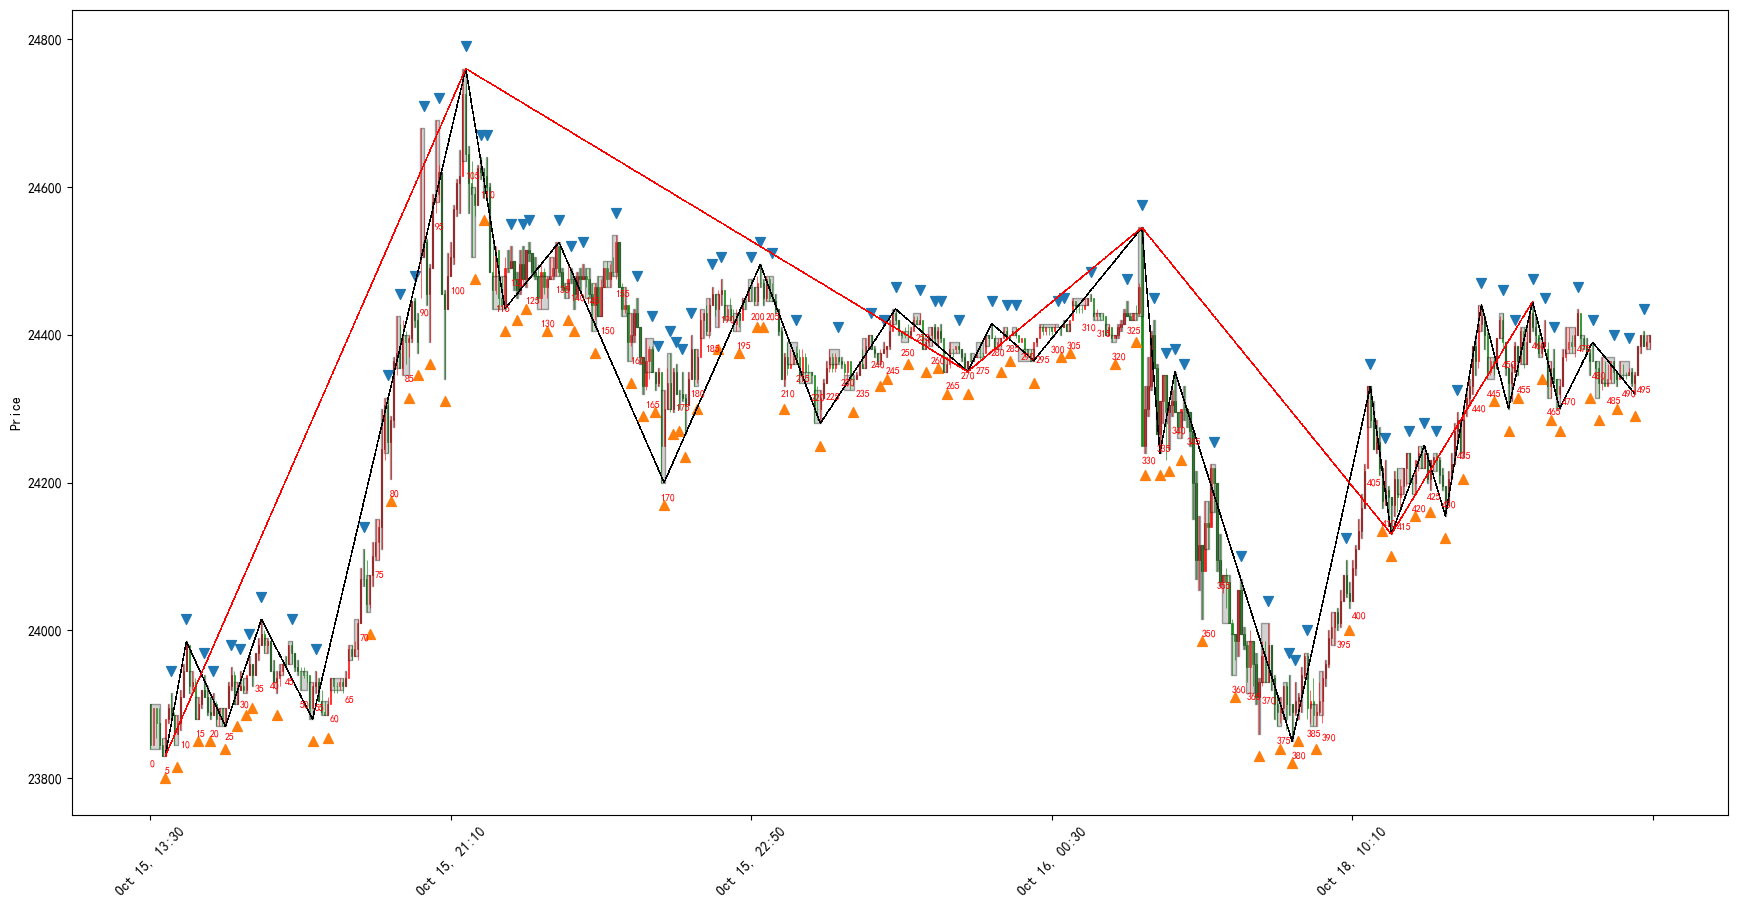

In [12]:
chan_theory.plot(
    df_ohlc,
    count,
    show_ordinary_id=True,
    show_merged_id=False,
    show_all_merged=True,
    hatch_merged=True,
    fractal_marker_size=50,
    fractal_marker_offset=30
)